In [ ]:
# ДЗ
# 1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# 2. Реализуйте удаление периодического шума

In [207]:
import numpy as np
import cv2 as cv
from random import randint
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max 

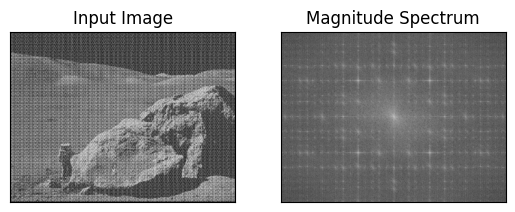

In [208]:
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# 1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

In [209]:
rows, cols = img.shape
crow, ccol = rows//2, cols//2

In [210]:
sigma = 30 
x = np.arange(cols)
y = np.arange(rows) 
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X - ccol)**2 + (Y - crow)**2) / (2 * sigma**2))
high_pass_mask = 1 - gaussian_mask

In [211]:
dft_shift_high_pass = dft_shift * high_pass_mask[:, :, np.newaxis]

f_ishift_gaussian = np.fft.ifftshift(dft_shift_high_pass)
img_back_high_pass = cv.idft(f_ishift_gaussian)
img_back_high_pass = cv.magnitude(img_back_high_pass[:,:,0], img_back_high_pass[:,:,1])

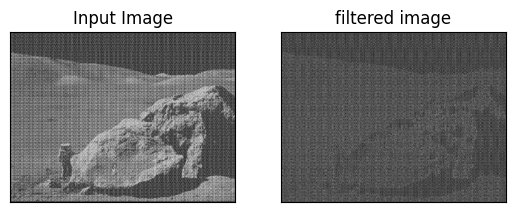

In [212]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_high_pass, cmap='gray')
plt.title('filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

# 2. Реализуйте удаление периодического шума

In [213]:
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

min_distance = 30
threshold_abs = 300
noise_coords = peak_local_max(magnitude_spectrum, min_distance=min_distance, threshold_abs=threshold_abs)

In [214]:
radius = 80
mask_noise = np.ones_like(dft_shift)
cv.circle(mask_noise, (ccol, crow), radius + 9, (0, 0, 0), -1)  
cv.circle(mask_noise, (ccol, crow), radius - 9, (1, 1, 1), -1); 

dft_shift_noise_removed = dft_shift * mask_noise
f_ishift_noise_removed = np.fft.ifftshift(dft_shift_noise_removed)
img_back_noise_removed = cv.idft(f_ishift_noise_removed)
img_back_noise_removed = cv.magnitude(img_back_noise_removed[:, :, 0], img_back_noise_removed[:, :, 1])

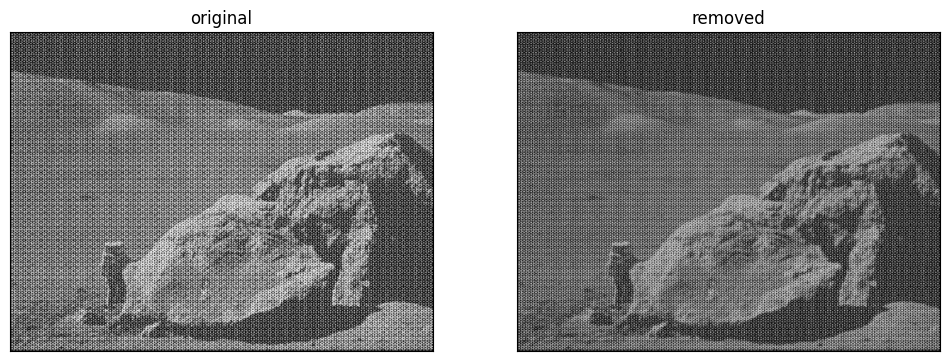

In [215]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_noise_removed, cmap='gray')
plt.title('removed'), plt.xticks([]), plt.yticks([])
plt.show()